In [2]:
import pandas as pd

df_chile = pd.read_parquet("data/df_chile.parquet.gzip")
df_rome  = pd.read_parquet("data/df_rome.parquet.gzip")
df_flor  = pd.read_parquet("data/df_flor.parquet.gzip")
df_italy = pd.read_parquet("data/df_italy.parquet.gzip")

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

def impute_dataframe(df):
    # Initialize the imputer
    imp = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

    # Store the original column names and indices
    original_columns = df.columns
    original_index = df.index

    # Convert the DataFrame to a numpy array and impute missing values
    imputed_data = imp.fit_transform(df)

    # Reconstruct the DataFrame with the original column and index labels
    df_imputed = pd.DataFrame(imputed_data, columns=original_columns, index=original_index)

    return df_imputed


In [4]:
df_chile['C'] = "Ch"
df_rome['C'] = "Ro"
df_flor['C'] =  "Fl"
df_italy['C'] = "It"
def reset_indexes(dfs, index_col='C'):
    new_dfs = []
    for df in dfs:
        df = df.set_index(index_col, verify_integrity=False)
        df = df.drop(index_col, axis=1, errors='ignore')  # errors='ignore' ensures the function doesn't fail if the column doesn't exist
        new_dfs.append(df)
    return new_dfs
        
df_list = reset_indexes([df_chile, df_rome, df_flor, df_italy], index_col='C')
df_list[0]

,age at diagnosis (months),ntbc dosis mg/kg/day,ntbc levels (dbs),suac,methionine (plasma),tyrosine (plasma),phenylalanine (plasma),pt (sec),bili total,gpt,got,ggt,alkaline phosphatase,glicemia,Alpha-Fet
C,,,,,,,,,,,,,,,
Ch,12.0,1.07,10.20,0.0,48.6,565.8,50.3,13.5,0.30,34.0,44.0,34.0,976.0,82.0,1
Ch,60.0,NaN,0.00,1.0,26.4,340.3,73.0,13.7,0.49,25.0,30.0,320.7,261.4,110.0,1
Ch,3.0,0.70,14.32,0.0,21.5,667.7,45.2,13.7,0.37,20.0,29.0,14.0,204.0,89.0,1
Ch,4.0,1.09,25.78,0.0,31.6,416.7,30.2,13.0,0.26,154.0,103.0,127.0,379.0,79.0,1
Ch,11.0,0.68,36.72,0.0,30.2,720.7,63.2,14.3,0.38,32.0,34.0,29.0,178.0,87.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ch,31.0,1.12,31.50,0.0,25.5,301.3,56.1,14.6,0.44,17.0,31.0,18.0,167.0,94.0,0
Ch,4.0,0.96,22.50,1.0,19.3,394.9,24.0,13.2,0.27,23.0,38.0,21.0,408.0,80.0,1
Ch,7.0,NaN,21.70,0.0,23.2,833.5,80.2,11.9,NaN,47.0,NaN,58.0,NaN,89.0,0


In [5]:
df_imputed_list = list(map(impute_dataframe, df_list))

df_imputed_list

/DeepenData/.miniconda/envs/playground/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[    age at diagnosis (months)  ntbc dosis mg/kg/day  ntbc levels (dbs)  suac  \
 C                                                                              
 Ch                       12.0              1.070000              10.20   0.0   
 Ch                       60.0              0.798116               0.00   1.0   
 Ch                        3.0              0.700000              14.32   0.0   
 Ch                        4.0              1.090000              25.78   0.0   
 Ch                       11.0              0.680000              36.72   0.0   
 ..                        ...                   ...                ...   ...   
 Ch                       31.0              1.120000              31.50   0.0   
 Ch                        4.0              0.960000              22.50   1.0   
 Ch                        7.0              1.106766              21.70   0.0   
 Ch                       36.0              1.005000              26.90   0.0   
 Ch                       22

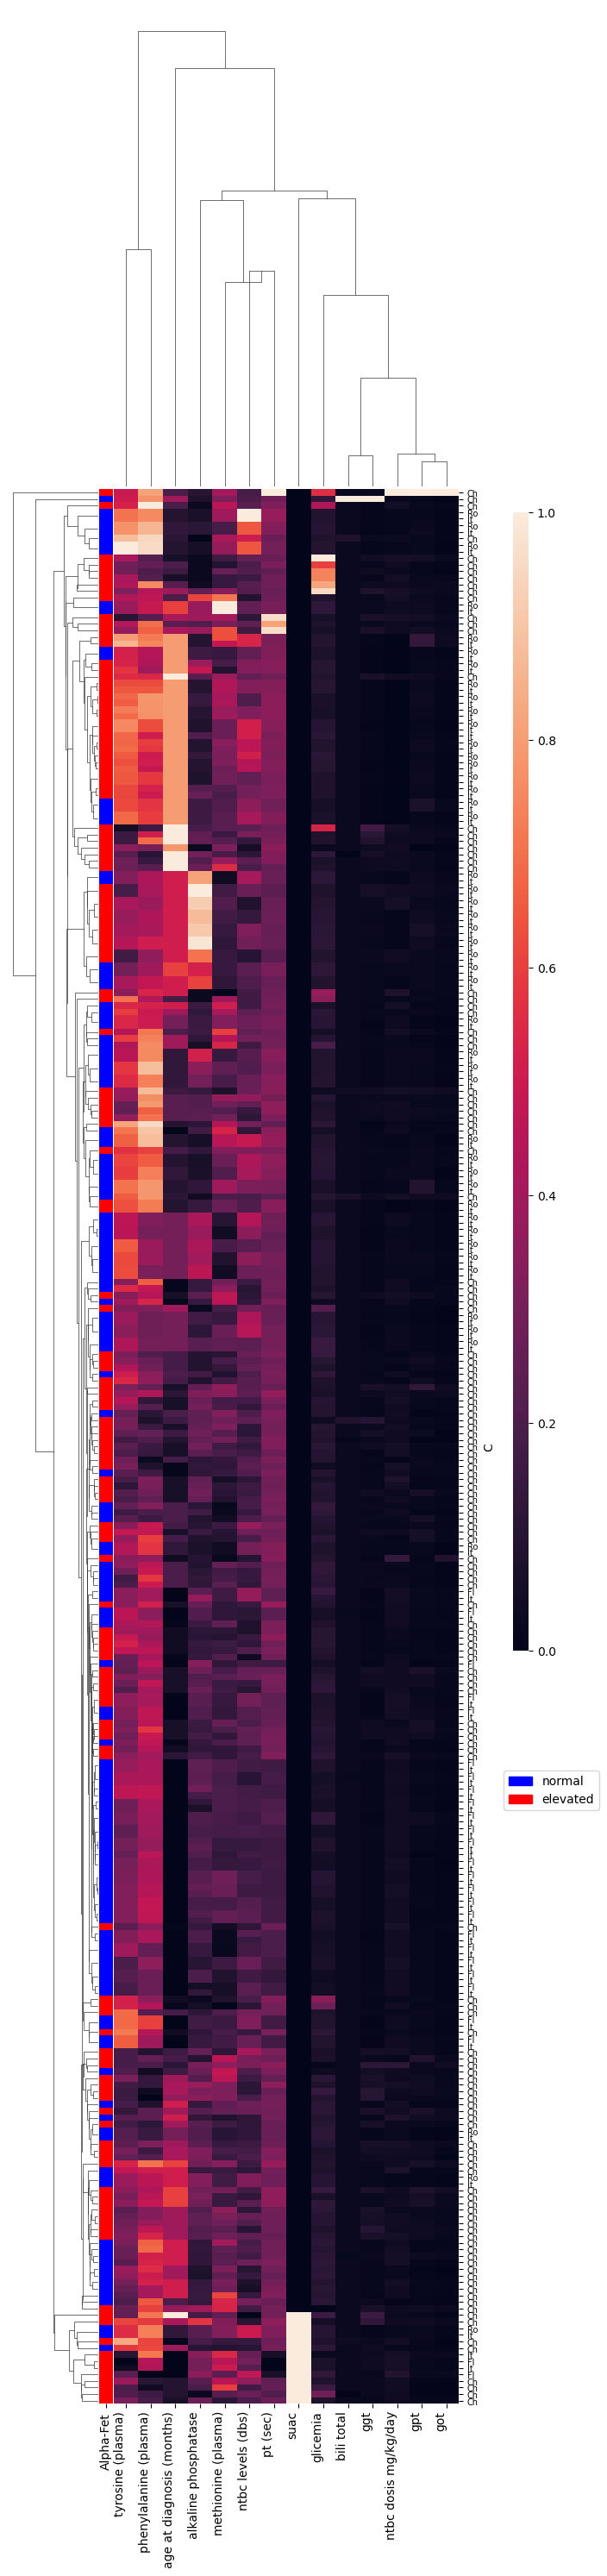

In [6]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

annot_col = 'Alpha-Fet'
col_annotation = pd.concat(df_imputed_list, axis=0)[annot_col].astype(int)#.reset_index(drop=True, inplace=False)
df             = pd.concat(df_imputed_list, axis=0).drop(annot_col, axis=1, inplace=False)#.reset_index(drop=True, inplace=False)
# Standardizing rows to have zero mean and unit variance
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns, index=df.index)

# Scaling standardized rows to fall into the range [0, 1]
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_standard_scaled), columns=df.columns, index=df.index)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from matplotlib import ticker

import matplotlib.patches as mpatches

def draw_clustermap(df, colorbar_pos, col_annotation=None, figsize=(10,10)):
    # Standardizing rows to have zero mean and unit variance
    standard_scaler = StandardScaler()
    df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns, index=df.index)

    # Scaling standardized rows to fall into the range [0, 1]
    min_max_scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_standard_scaled), columns=df.columns, index=df.index)

    # If col_annotation is provided, map 0 to 'blue' and 1 to 'red'
    if col_annotation is not None:
        col_annotation = col_annotation.map({0: 'blue', 1: 'red'})

    # Creating the clustermap
    g = sns.clustermap(df_scaled, figsize=figsize, row_colors=col_annotation, metric='euclidean', method='centroid', yticklabels=True)

    # Adjust colorbar position
    g.cax.set_position(colorbar_pos)

    # Add label to the colorbar
    g.cax.yaxis.set_label_position("right")
    g.cax.set_ylabel('', rotation=0, va="bottom", labelpad=15)

    # Rotate xticklabels and adjust size
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, ha="right", fontsize=10)

    # Show all yticklabels
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=7)
    
    # Add padding
    g.ax_heatmap.tick_params(axis='x', pad=2)

    # Create a legend for the color coding
    blue_patch = mpatches.Patch(color='blue', label='normal')
    red_patch = mpatches.Patch(color='red', label='elevated')
    plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(-1, -.1), loc='upper left')






draw_clustermap(df_scaled, [1., 0.36, 0.03, 0.44],col_annotation ,figsize=(6,30))  # [left, bottom, width, height]


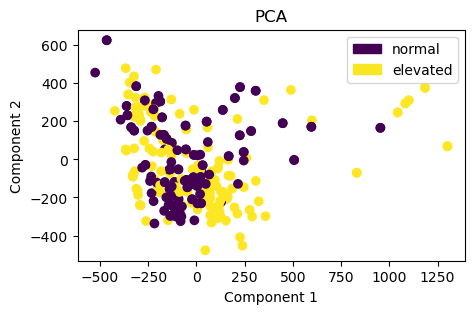

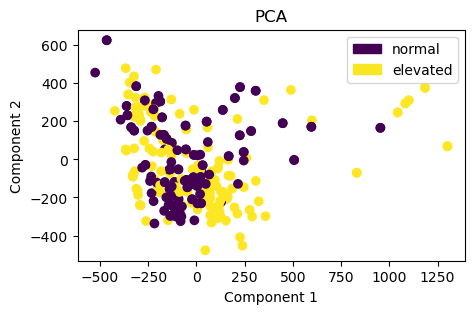

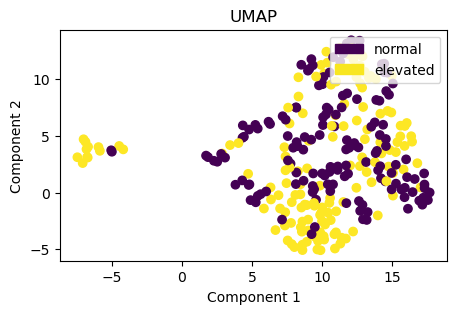

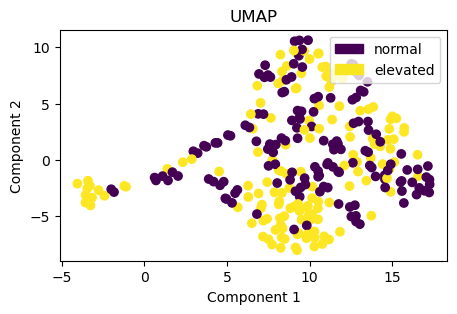

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import umap
import matplotlib.pyplot as plt

def analyze_dataframes(df_list, column_to_extract, dim_red_method, n_neighbors=10):
    # Create an empty list to store the extracted columns
    extracted_vectors = []

    # Create an empty list to store the dimensionality reduction results
    dim_red_results = []

    # For each DataFrame
    for df in df_list:
        # Extract the specified column and append it to the list
        extracted_vector = df[column_to_extract]
        extracted_vectors.append(extracted_vector)

        # Drop the specified column from the DataFrame
        df = df.drop(column_to_extract, axis=1)

        # Perform dimensionality reduction
        if dim_red_method == 'PCA':
            dim_red = PCA(n_components=2)
        elif dim_red_method == 't-SNE':
            dim_red = TSNE(n_components=2, perplexity=n_neighbors)
        elif dim_red_method == 'UMAP':
            dim_red = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=1)
        elif dim_red_method == 'Isomap':
            dim_red = Isomap(n_components=2, n_neighbors=n_neighbors)
        else:
            raise ValueError(f"Unsupported dimensionality reduction method: {dim_red_method}")

        dim_red_result = dim_red.fit_transform(df)
        dim_red_results.append(dim_red_result)

    # Now, plot the dimensionality reduction results
    for i, dim_red_result in enumerate(dim_red_results):
        plt.figure(figsize=(5, 3))
        plt.title(f'{dim_red_method}')
        scatter = plt.scatter(dim_red_result[:, 0], dim_red_result[:, 1], c=extracted_vectors[i], cmap='viridis')
        
        # Create a legend for the binary color coding
        cmap = plt.cm.viridis
        blue_patch = mpatches.Patch(color=cmap(0.), label='normal')
        yellow_patch = mpatches.Patch(color=cmap(0.99), label='elevated')
        plt.legend(handles=[blue_patch, yellow_patch], loc='upper right')

        #plt.colorbar(scatter)
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()
        
        


analyze_dataframes(2*[pd.concat(df_imputed_list, axis=0)], 'Alpha-Fet', 'PCA')
analyze_dataframes(2*[pd.concat(df_imputed_list, axis=0)], 'Alpha-Fet', 'UMAP')



In [ ]:

#analyze_dataframes(df_imputed_list, 'Alpha-Fet', 'PCA')
analyze_dataframes(df_imputed_list, 'Alpha-Fet', 't-SNE')
analyze_dataframes(df_imputed_list, 'Alpha-Fet', 'UMAP')

#analyze_dataframes(df_imputed_list, 'Alpha-Fet', 'Isomap')
